In [1]:
import pandas as pd
# Generación del primer DataFrame (Estudiantes del grupo A)
data_a = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'Nombre': ['Juan', 'Ana', 'Luis', 'María', 'Carlos', 'Elena', 'Marta', 'Pedro', 'Jorge', 'Lucía'],
          'Materia': ['Matemáticas', 'Física', 'Química', 'Historia', 'Literatura', 'Biología', 'Informática', 
                      'Geografía', 'Filosofía', 'Arte'],
          'Calificación': [85, 90, 88, 70, 95, 78, 83, 92, 85, 80]}
grupo_a = pd.DataFrame(data_a)
# Generación del segundo DataFrame (Estudiantes del grupo B)
data_b = {'ID': [4, 5, 6, 7, 10, 11, 12, 13, 14, 15],
          'Nombre': ['María', 'Carlos', 'Elena', 'Marta', 'Lucía', 'Roberto', 'Sofía', 'Raúl', 'David', 'Laura'],
          'Materia': ['Historia', 'Literatura', 'Filosofía', 'Informática', 'Arte', 'Química', 'Matemáticas', 
                      'Física', 'Geografía', 'Biología'],
          'Calificación': [80, 85, 88, 90, 75, 82, 89, 87, 91, 77]}
grupo_b = pd.DataFrame(data_b)
# Mostrar los DataFrames
print("Grupo A:\n")
grupo_a


Grupo A:



,ID,Nombre,Materia,Calificación
0,1,Juan,Matemáticas,85
1,2,Ana,Física,90
2,3,Luis,Química,88
3,4,María,Historia,70
4,5,Carlos,Literatura,95
5,6,Elena,Biología,78
6,7,Marta,Informática,83
7,8,Pedro,Geografía,92
8,9,Jorge,Filosofía,85
9,10,Lucía,Arte,80


In [12]:
print("\nGrupo B:\n")
grupo_b


Grupo B:



,ID,Nombre,Materia,Calificación
0,4,María,Historia,80
1,5,Carlos,Literatura,85
2,6,Elena,Filosofía,88
3,7,Marta,Informática,90
4,10,Lucía,Arte,75
5,11,Roberto,Química,82
6,12,Sofía,Matemáticas,89
7,13,Raúl,Física,87
8,14,David,Geografía,91
9,15,Laura,Biología,77


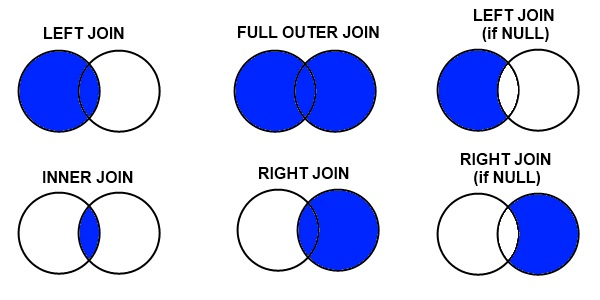

In [13]:
# Unión de los dos DataFrames (equivalente a UNION)
union = pd.concat([grupo_a, grupo_b]).drop_duplicates().reset_index(drop=True)

print("Unión:\n")
union


Unión:



,ID,Nombre,Materia,Calificación
0,1,Juan,Matemáticas,85
1,2,Ana,Física,90
2,3,Luis,Química,88
3,4,María,Historia,70
4,5,Carlos,Literatura,95
5,6,Elena,Biología,78
6,7,Marta,Informática,83
7,8,Pedro,Geografía,92
8,9,Jorge,Filosofía,85
9,10,Lucía,Arte,80


In [14]:
# Intersección de los dos DataFrames (equivalente a INTERSECT)
interseccion = pd.merge(grupo_a, grupo_b, on=['ID', 'Nombre'], how='inner')

print("Intersección:\n")
interseccion


Intersección:



,ID,Nombre,Materia_x,Calificación_x,Materia_y,Calificación_y
0,4,María,Historia,70,Historia,80
1,5,Carlos,Literatura,95,Literatura,85
2,6,Elena,Biología,78,Filosofía,88
3,7,Marta,Informática,83,Informática,90
4,10,Lucía,Arte,80,Arte,75


In [15]:
# Diferencia (Grupo A - Grupo B)
diferencia = pd.merge(grupo_a, grupo_b, on='ID', how='left', indicator=True)
diferencia_a = diferencia[diferencia['_merge'] == 'left_only'].drop('_merge', axis=1)

print("Diferencia (A - B):\n")
diferencia_a


Diferencia (A - B):



,ID,Nombre_x,Materia_x,Calificación_x,Nombre_y,Materia_y,Calificación_y
0,1,Juan,Matemáticas,85,NaN,NaN,NaN
1,2,Ana,Física,90,NaN,NaN,NaN
2,3,Luis,Química,88,NaN,NaN,NaN
7,8,Pedro,Geografía,92,NaN,NaN,NaN
8,9,Jorge,Filosofía,85,NaN,NaN,NaN


In [17]:
# Join (equivalente a combinación por 'ID')
join = grupo_a.join(grupo_b.set_index('ID'), on='ID', lsuffix='_A', rsuffix='_B')

print("Join:\n")
join


Join:



,ID,Nombre_A,Materia_A,Calificación_A,Nombre_B,Materia_B,Calificación_B
0,1,Juan,Matemáticas,85,NaN,NaN,NaN
1,2,Ana,Física,90,NaN,NaN,NaN
2,3,Luis,Química,88,NaN,NaN,NaN
3,4,María,Historia,70,María,Historia,80.0
4,5,Carlos,Literatura,95,Carlos,Literatura,85.0
5,6,Elena,Biología,78,Elena,Filosofía,88.0
6,7,Marta,Informática,83,Marta,Informática,90.0
7,8,Pedro,Geografía,92,NaN,NaN,NaN
8,9,Jorge,Filosofía,85,NaN,NaN,NaN
9,10,Lucía,Arte,80,Lucía,Arte,75.0


INNER JOIN
Descripción: Devuelve solo las filas donde las claves están presentes en ambos DataFrames. Es equivalente a la intersección en conjuntos.

In [19]:
# INNER JOIN (solo las coincidencias entre ambos DataFrames)
inner_join = pd.merge(grupo_a, grupo_b, on='ID', how='inner', suffixes=('_A', '_B'))
print("INNER JOIN:\n")
inner_join


INNER JOIN:



,ID,Nombre_A,Materia_A,Calificación_A,Nombre_B,Materia_B,Calificación_B
0,4,María,Historia,70,María,Historia,80
1,5,Carlos,Literatura,95,Carlos,Literatura,85
2,6,Elena,Biología,78,Elena,Filosofía,88
3,7,Marta,Informática,83,Marta,Informática,90
4,10,Lucía,Arte,80,Lucía,Arte,75


LEFT JOIN
Descripción: Devuelve todas las filas del DataFrame izquierdo (Grupo A), junto con las filas coincidentes del DataFrame derecho (Grupo B). Las filas que no tienen coincidencias en el DataFrame derecho tendrán valores NaN.

In [20]:
# LEFT JOIN (todos los elementos del Grupo A, y coincidencias del Grupo B)
left_join = pd.merge(grupo_a, grupo_b, on='ID', how='left', suffixes=('_A', '_B'))
print("LEFT JOIN:\n")
left_join

LEFT JOIN:



,ID,Nombre_A,Materia_A,Calificación_A,Nombre_B,Materia_B,Calificación_B
0,1,Juan,Matemáticas,85,NaN,NaN,NaN
1,2,Ana,Física,90,NaN,NaN,NaN
2,3,Luis,Química,88,NaN,NaN,NaN
3,4,María,Historia,70,María,Historia,80.0
4,5,Carlos,Literatura,95,Carlos,Literatura,85.0
5,6,Elena,Biología,78,Elena,Filosofía,88.0
6,7,Marta,Informática,83,Marta,Informática,90.0
7,8,Pedro,Geografía,92,NaN,NaN,NaN
8,9,Jorge,Filosofía,85,NaN,NaN,NaN
9,10,Lucía,Arte,80,Lucía,Arte,75.0


RIGHT JOIN
Descripción: Devuelve todas las filas del DataFrame derecho (Grupo B), junto con las filas coincidentes del DataFrame izquierdo (Grupo A). Las filas que no tienen coincidencias en el DataFrame izquierdo tendrán valores NaN.

In [21]:
# RIGHT JOIN (todos los elementos del Grupo B, y coincidencias del Grupo A)
right_join = pd.merge(grupo_a, grupo_b, on='ID', how='right', suffixes=('_A', '_B'))
print("RIGHT JOIN:\n")
right_join

RIGHT JOIN:



,ID,Nombre_A,Materia_A,Calificación_A,Nombre_B,Materia_B,Calificación_B
0,4,María,Historia,70.0,María,Historia,80
1,5,Carlos,Literatura,95.0,Carlos,Literatura,85
2,6,Elena,Biología,78.0,Elena,Filosofía,88
3,7,Marta,Informática,83.0,Marta,Informática,90
4,10,Lucía,Arte,80.0,Lucía,Arte,75
5,11,NaN,NaN,NaN,Roberto,Química,82
6,12,NaN,NaN,NaN,Sofía,Matemáticas,89
7,13,NaN,NaN,NaN,Raúl,Física,87
8,14,NaN,NaN,NaN,David,Geografía,91
9,15,NaN,NaN,NaN,Laura,Biología,77


OUTER JOIN
Descripción: Devuelve todas las filas cuando hay coincidencia en una clave, o no. Las filas sin coincidencias en ambos DataFrames llenan con NaN. Es equivalente a la unión en conjuntos.

In [22]:
# OUTER JOIN (todos los elementos de ambos DataFrames, coincidencias y no coincidencias)
outer_join = pd.merge(grupo_a, grupo_b, on='ID', how='outer', suffixes=('_A', '_B'))
print("OUTER JOIN:\n")
outer_join

OUTER JOIN:



,ID,Nombre_A,Materia_A,Calificación_A,Nombre_B,Materia_B,Calificación_B
0,1,Juan,Matemáticas,85.0,NaN,NaN,NaN
1,2,Ana,Física,90.0,NaN,NaN,NaN
2,3,Luis,Química,88.0,NaN,NaN,NaN
3,4,María,Historia,70.0,María,Historia,80.0
4,5,Carlos,Literatura,95.0,Carlos,Literatura,85.0
5,6,Elena,Biología,78.0,Elena,Filosofía,88.0
6,7,Marta,Informática,83.0,Marta,Informática,90.0
7,8,Pedro,Geografía,92.0,NaN,NaN,NaN
8,9,Jorge,Filosofía,85.0,NaN,NaN,NaN
9,10,Lucía,Arte,80.0,Lucía,Arte,75.0


CROSS JOIN (Producto cartesiano)
Descripción: Devuelve el producto cartesiano de ambos DataFrames, es decir, combina cada fila del primer DataFrame con cada fila del segundo DataFrame.

In [23]:
# CROSS JOIN (producto cartesiano entre los DataFrames)
cross_join = grupo_a.merge(grupo_b, how='cross')
print("CROSS JOIN:\n")
cross_join

CROSS JOIN:



,ID_x,Nombre_x,Materia_x,Calificación_x,ID_y,Nombre_y,Materia_y,Calificación_y
0,1,Juan,Matemáticas,85,4,María,Historia,80
1,1,Juan,Matemáticas,85,5,Carlos,Literatura,85
2,1,Juan,Matemáticas,85,6,Elena,Filosofía,88
3,1,Juan,Matemáticas,85,7,Marta,Informática,90
4,1,Juan,Matemáticas,85,10,Lucía,Arte,75
...,...,...,...,...,...,...,...,...
95,10,Lucía,Arte,80,11,Roberto,Química,82
96,10,Lucía,Arte,80,12,Sofía,Matemáticas,89
97,10,Lucía,Arte,80,13,Raúl,Física,87
98,10,Lucía,Arte,80,14,David,Geografía,91
